#Bancada 3

**<center>Universidade Federal do Pará</center>**

**Curso:** Engenharia Elétrica

**Disciplina:** Laboratório De Sistemas De Controle

**Docente:** Cleison Daniel Silva

**Discentes:**

Edimar Fernandes Dias - 201933940004

D'nne D'Vitor    

Rodrigo de Souza Castro - 201833940020             


#PROJETO CONTROLADOR PROPORCIONAL E PROPORCIONAL-INTEGRAL PARA DEGRAU .

**Para projetarmos o controlador Proporcional vamos utilizar os dados coletado da bancada.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import control as ct
from control.matlab import *
import matplotlib.pyplot as plt

In [ ]:
dados = np.load("/content/drive/MyDrive/driverclt/dados_degrau.npy")




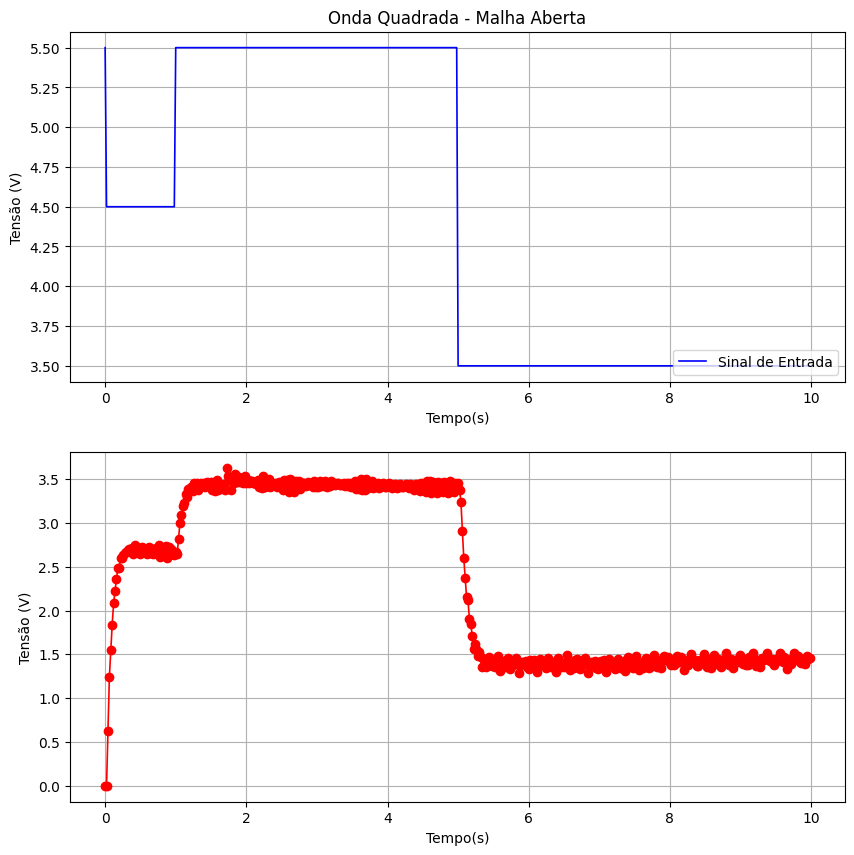

In [ ]:
tempo = dados[:, 0]
sinal_entrada = dados[:, 1]
sinal_saida = dados[:, 2]

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(tempo, sinal_entrada, '-b', linewidth=1.2)
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão (V)')
plt.grid()
plt.title('Onda Quadrada - Malha Aberta')
plt.legend(loc='lower right', labels=('Sinal de Entrada', 'Sinal de Saída'))

plt.subplot(212)
plt.plot(tempo, sinal_saida, '-ro', linewidth=1.2)
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão (V)')
plt.grid()
#plt.title('Tensão de Saída - Malha Aberta')
plt.show()


**Primeiramente iremos Remover o nível DC dos sinais coletados**

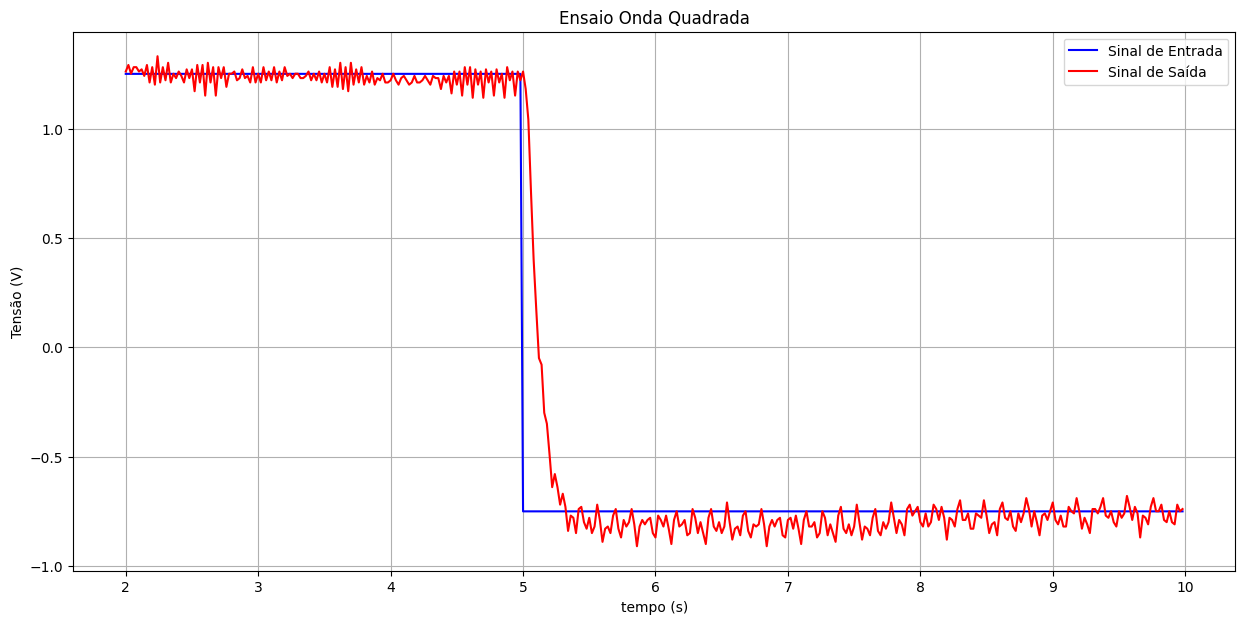

Nivel DC entrada: 4.25
Nivel DC saída: 2.199375


In [ ]:
# ________________ Define janela que despreza os primeiros instantes do ensaio __________#

janela = (tempo>2) & (tempo<14)



nivel_dc_entrada = np.mean(sinal_entrada[janela])
#nivel_dc_entrada = 7.

nivel_dc_saida = np.mean(sinal_saida[janela])

# ________________ Remove Nivel DC da Entrada e da Saída __________#

r = sinal_entrada - nivel_dc_entrada
y = sinal_saida - nivel_dc_saida

plt.figure(figsize=(15,7))
plt.plot(tempo[janela],r[janela], c = 'b', label = "Sinal de Entrada")
plt.plot(tempo[janela],y[janela], c = 'r', label = "Sinal de Saída")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

print("Nivel DC entrada:" , nivel_dc_entrada )
print("Nivel DC saída:" , nivel_dc_saida )

**Analise par apenas um periodo do sinal**

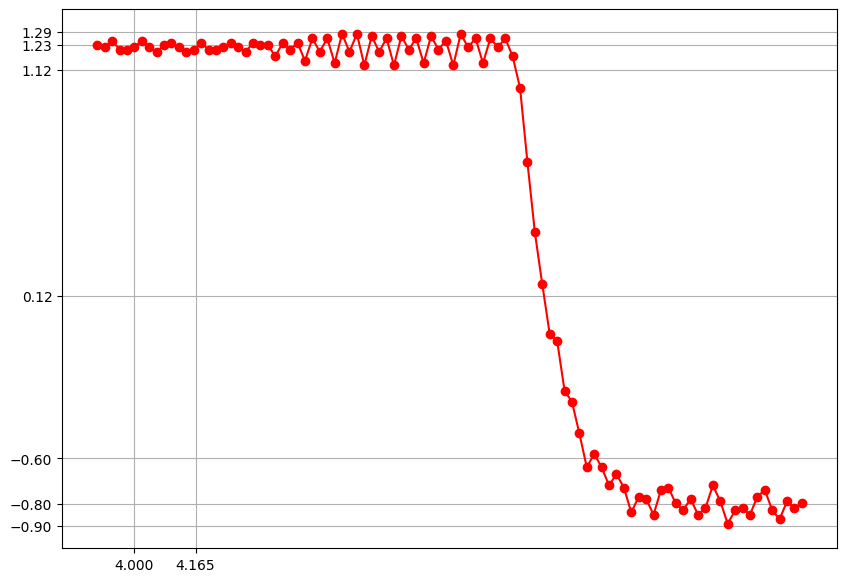

In [ ]:
# ________________ Define o intervalo de tempo entre os instantes 3.9 e 5.1 segundos __________#

janela2 = (tempo>3.9)&(tempo<5.8)

plt.figure(figsize=(10,7))
plt.plot(tempo[janela2],y[janela2],'-or')
# plt.plot(tempo[index],r[index],c = 'b')
# plt.yticks([-.5,-.4,0.3097,0.4,0.45,0.5])
plt.yticks([1.12,0.12,-0.80,-0.90, -0.60, 1.29, 1.23])
#plt.yticks([-0.20,0.053,0.17])

plt.xticks([4,4.165])
plt.grid()
plt.show()

**Estimativa de Km**

In [ ]:
Km = (1.22 - (-0.80) )/ 2
print(Km)

1.01


**Estimativa de Tau**

In [ ]:
y_6321 = 0.6321*(1.23 - (-0.80)) - 0.90
y_6321

0.38316300000000003

**Simulação do modelo.**

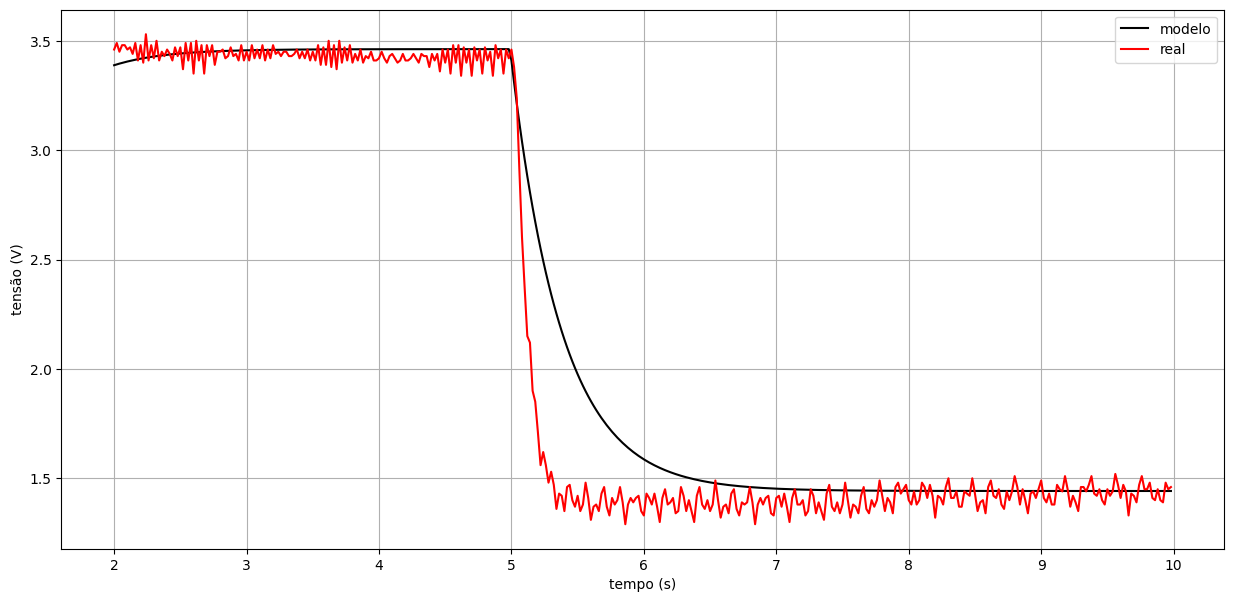


    1.01
------------
0.3832 s + 1

Erro RMS: 2.1147209175136337


In [ ]:
# ________________ Simulação do Modelo Determinado __________#

Km = 1.01
τ = 0.38316300000000003

num = [Km]
den = [τ, 1]

G = ct.tf(num,den)
_,ym = ct.forced_response(G,T = tempo, U = r)

plt.figure(figsize=(15,7))
plt.plot(tempo[janela], ym[janela] + nivel_dc_saida ,'k', label = 'modelo')
plt.plot(tempo[janela], sinal_saida[janela] ,'r', label = 'real')
# plt.axis([0,14,-.5,0.5])
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.legend()
plt.grid()
plt.show()
print (G)

erro_rms = (np.sum((ym[janela] - sinal_saida[janela])**2)/np.size(sinal_saida[janela]))
print("Erro RMS:", np.sqrt(erro_rms))

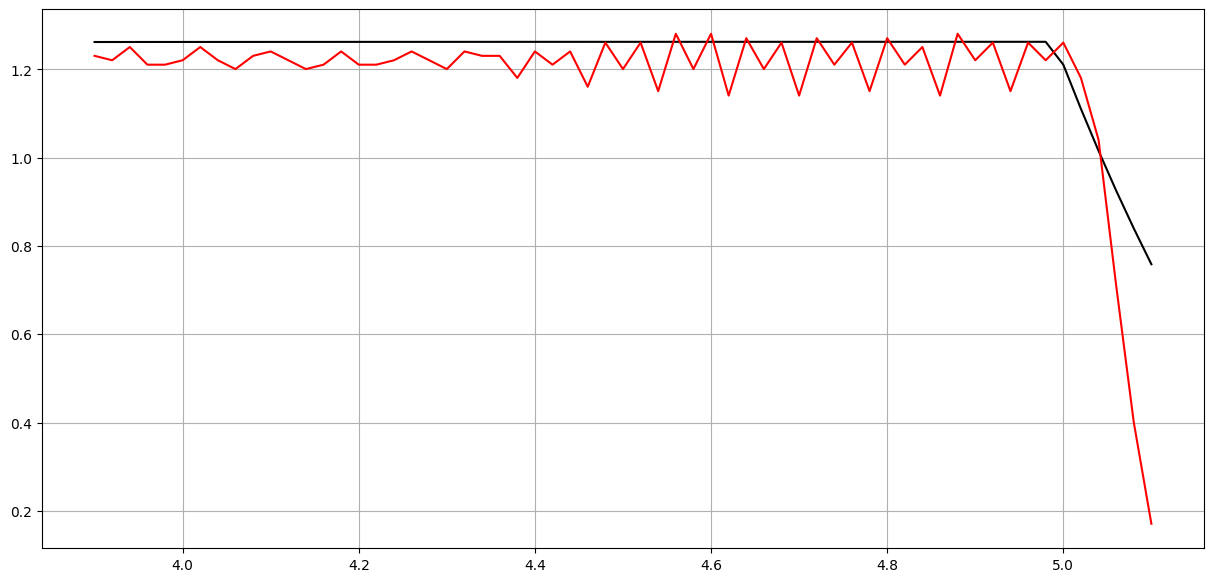

In [ ]:
# ________________ Define o intervalo de tempo entre os instantes 3.9 e 5.1 segundos __________#

index = (tempo>3.9)&(tempo<5.1)

plt.figure(figsize=(15,7))
plt.plot(tempo[index],ym[index],'k',tempo[index],y[index],'r')
plt.grid()
plt.show()

#Observando o sistema em malha aberta uma ultima vez.

In [ ]:
# Sistema Malha aberta
numAmostras = 500
t = np.zeros(numAmostras)
y = np.zeros(numAmostras)
Ts = 0.02
fre = 0.1
r = 1
u = np.zeros(numAmostras)
for n in range(numAmostras):
    u[n] = r*square(2*np.pi*fre*n*Ts)
    t[n] = n*Ts

#km = 1.2
#tau = 0.171
km = 1.26
tau = 0.38316300000000003

Num = np.array([km])
Den = np.array([tau, 1])
Gs = ct.tf(Num, Den)
print('G(s) =',Gs)

t, Y = ct.forced_response(Gs, t, u)

plt.figure()
plt.plot(t, Y)
plt.title('Simulação em Malha Aberta')
plt.grid()
plt.show()

NameError: ignored

    Eigenvalue (pole)       Damping     Frequency
               -2.611             1         2.611


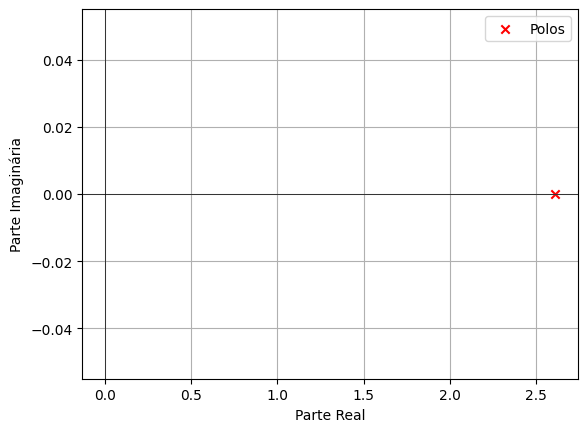

Fatores de amortecimento: [1.]
Frequências naturais: [-2.61096606+0.j]


In [ ]:
import control as ctrl
import matplotlib.pyplot as plt

# Defina a função de transferência G(s)
numerator = [1.01]
denominator = [0.383, 1]
sys = ctrl.TransferFunction(numerator, denominator)

# Obtenha os polos, fatores de amortecimento e frequências naturais usando damp
poles, damping_ratio, natural_frequency = ctrl.damp(sys)

# Plote os polos no plano complexo
plt.scatter(poles.real, poles.imag, marker='x', color='red', label='Polos')

plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# Exiba os fatores de amortecimento e as frequências naturais
print('Fatores de amortecimento:', damping_ratio)
print('Frequências naturais:', natural_frequency)


#Vamos implementar um controlador proporcional (P)

In [ ]:
kp = (10/7 - 1)/km  #Definindo o valor do ganho proporcional Kp
Gc = kp
H = ct.feedback(Gc*Gs, 1, -1)
t, Ymf = ct.forced_response(H, t, u) #Resposta de malha fechada do sistema com controlador Kp

print("Ganho Proporcional: ", kp)
Ganho = (km*kp)/(1+kp*km)
print("Ganho DC: ", Ganho)


# Sinal de entrada e de referência
N = 500
Amplutude = 1
freq = 0.25
Fs = 50
Ts = 1/Fs
km = 1.06
tau = 0.38316300000000003

n = np.arange(0, N)
tempo = n*Ts

sinal_de_entrada = Amplutude*square(2*np.pi*freq*n*Ts)
sinal_de_referencia = km*Amplutude*square(2*np.pi*freq*n*Ts)
nivel_dc_entrada = 4.25
# Sistema em Malha Aberta

NUM = [km]
DEN = [tau, 1]
G = ct.tf(NUM, DEN)

_, y_malha_aberta = ct.forced_response(G, T=tempo, U=sinal_de_entrada)
print("Sistema em Malha Aberta:\n", G)

#Controlador Propocional
Kp = 0.40431266846361186
Gc = kp

#Sistema em Malha Fechada

H = ct.feedback(Gc*G, 1, sign=-1)
print("Sistema em Malha Fechada:\n", H)

## ________Simulação do Sistema em Malha Fechada para Onda Quadrada __________##

_, y_malha_fechada = ct.forced_response(H, T=tempo, U=sinal_de_referencia)

plt.figure(figsize=(10, 7))
plt.plot(tempo, y_malha_fechada, '-k', label="y(t): Malha Fechada")
plt.plot(tempo, 0.3*y_malha_aberta, '-b', label="y(t): Malha aberta")
plt.plot(tempo, sinal_de_entrada, '-r', label="u(t): Entrada")
plt.plot(tempo, sinal_de_referencia, '-g', label="r(t): Referência")
plt.title('Simulação em Malha Fechada Proporcional')
plt.legend()
plt.grid()
plt.show()


NameError: ignored

# **Sinal de Controle**

<p align = 'justify' > Em simulação, pode-se admitir valores elevados para o ganho do controlador, com a finalidade de reduzir o erro em regime permanente. No entanto, quanto maior o valor de $K_p$, maior será a magnitude do sinal de controle. </p>

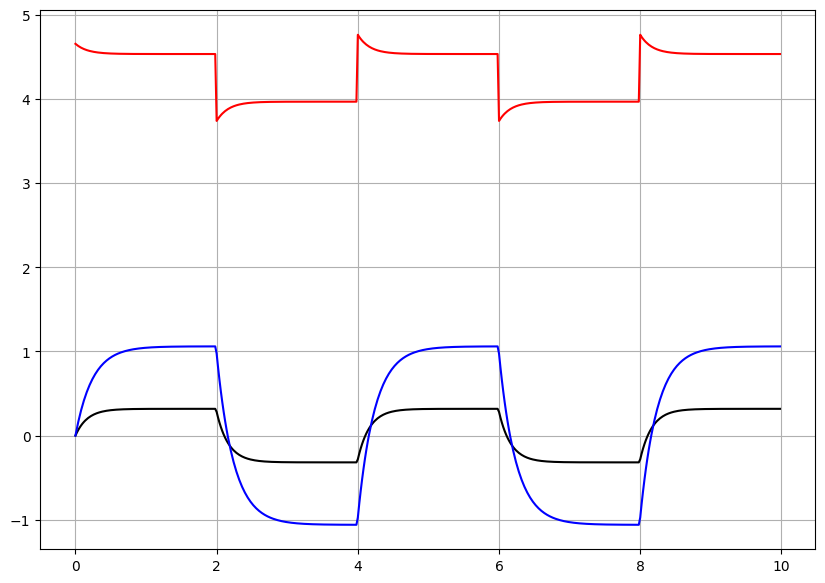

In [ ]:
C = ct.feedback(Gc, G, sign =-1)
_, sinal_controle = ct.forced_response(C, T = tempo, U = sinal_de_entrada)

## ________Simulação do Sistema em Malha Fechada para Onda Quadrada __________##

plt.figure(figsize=(10,7))
plt.plot(tempo, y_malha_fechada, '-k')
plt.plot(tempo, y_malha_aberta, '-b')
plt.plot(tempo, sinal_controle+nivel_dc_entrada, '-r', label= "Sinal de Controle")
plt.grid()
plt.show()


Ganho do Controlador PI: 
 1.4443791698113204 
 Zero do PI: 
 4.364315948187755
{'RiseTime': 0.33037550609866234, 'SettlingTime': 0.5682458704896992, 'SettlingMin': 0.9080865763705637, 'SettlingMax': 1.0006568611418192, 'Overshoot': 0.06568611418191761, 'Undershoot': 0, 'Peak': 1.0006568611418192, 'PeakTime': 1.096846680247559, 'SteadyStateValue': 1.0}


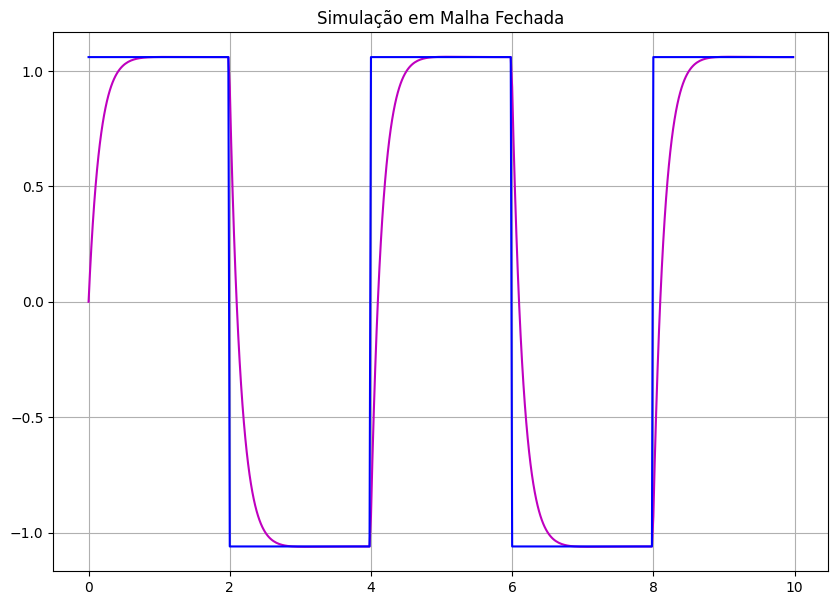

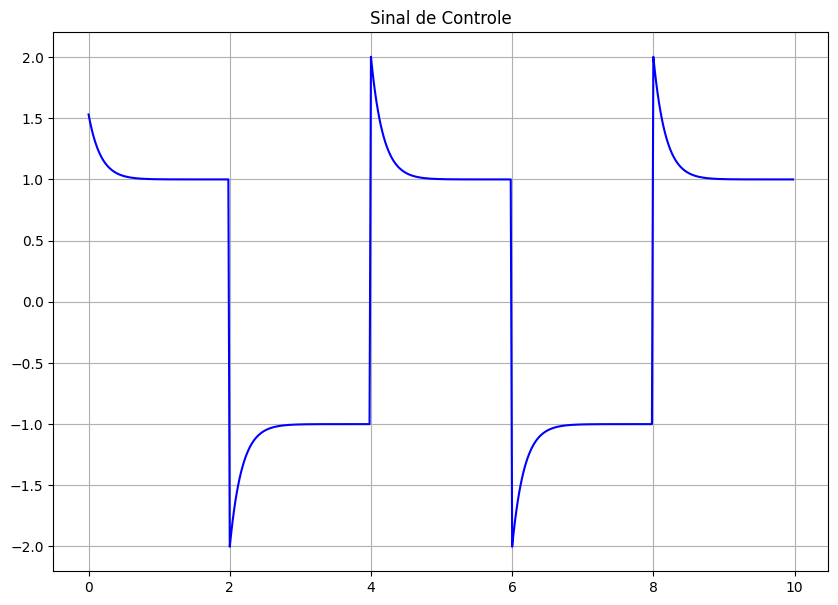

In [ ]:

b = 1/tau
K = Km

# Fator de Amortecimento
qsi =  1

# Freq Natural
wn = 5.28
kp = 0.40431266846361186

Kc = (((2*qsi*wn)/b)-1)/K
a =  (wn**2)/(Kc*K*b)

print('Ganho do Controlador PI: \n', Kc, '\n Zero do PI: \n', a)

# K = 3.57
# a = -24

Gc = ct.tf([Kc*1,Kc*a],[1,0])

H_pi = ct.feedback(Gc*G, 1, sign = -1)
print(ct.step_info(H_pi))

C_pi = ct.feedback(Gc, G, sign = -1)

_,ymf_pi = ct.forced_response(H_pi, T = tempo, U = sinal_de_referencia)
_,u_pi = ct.forced_response(C_pi,T = tempo, U = sinal_de_referencia)

plt.figure(figsize=(10,7))
# plt.plot(tempo,ym,'k' ,tempo,y,'r')
plt.plot(tempo,ymf_pi,'m')
plt.plot(tempo,sinal_de_referencia, 'b')
plt.title("Simulação em Malha Fechada")
plt.grid()
plt.show()

plt.figure(figsize=(10,7))
plt.plot(tempo,u_pi,'b')
plt.title("Sinal de Controle")
plt.grid()
plt.show()


Polos de MF: 
 [-5.28000008+0.j -5.27999992+0.j]


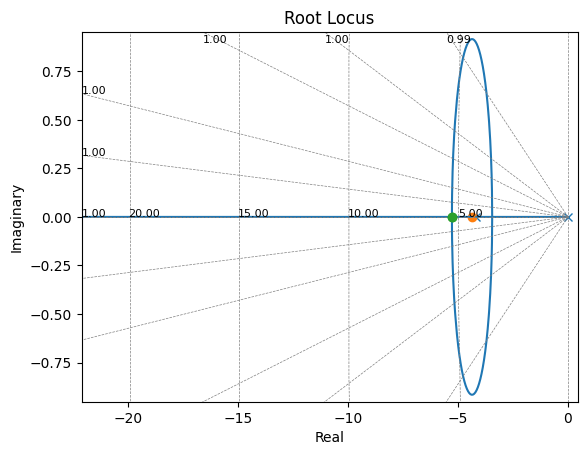

Freq Natural: 
 [5.28000008 5.27999992]
Fator de Amortecimento: 
 [1. 1.]


In [ ]:
ct.rlocus(Gc*G, plot=True, grid = True);
print('Polos de MF: \n', H_pi.pole() )
plt.plot(np.real(H_pi.pole()),np.imag(H_pi.pole()),'o')
plt.show()
print('Freq Natural: \n', np.abs(H_pi.pole()))
print('Fator de Amortecimento: \n', np.cos(np.pi - np.angle(H_pi.pole())))

In [ ]:
Gz = ct.c2d(Gc,Ts, 'tustin')

print('Função de Transferência: \n', Gz)

Função de Transferência: 
 
1.507 z - 1.381
---------------
     z - 1

dt = 0.02



In [ ]:
NUM = np.array([-0.00520774,  0.04057268])
DEN = np.array([ 1, -1.49522979,  0.53294767])
Ts = 0.015

G = ct.tf(NUM,DEN,Ts)

print('Função de Transferência: \n', G)

print(G.zeros())

Função de Transferência: 
 
-0.005208 z + 0.04057
----------------------
z^2 - 1.495 z + 0.5329

dt = 0.015

[7.79084209+0.j]
